# UPENN DATASET

In [4]:
import os
from os.path import join, isdir, exists
from matplotlib import pyplot as plt
import nibabel as nib
import shutil

ROOT = "/home/tbarba/projects/MultiModalBrainSurvival/"
DATA = join(ROOT, "data/MR/UPENN")
DESTINATION = join(DATA, "selected")



In [ ]:
def ls_dir(path):
    dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    return dirs

sequences_path =join(DATA, "UPENN_data/images_structural")
segmentations_path =join(DATA, "UPENN_data/automated_segm")
cases_id = ls_dir(sequences_path)


sequences = ["T1GD", "FLAIR"]
for case in cases_id[:]:
    target_dir = join(DESTINATION, case)
    os.makedirs(target_dir, exist_ok=True)
    sequences = join(sequences_path, case)
    try:
        T1_path = [s for s in os.listdir(sequences) if "T1GD" in s][0]
        FLAIR_path = [s for s in os.listdir(sequences) if "FLAIR" in s][0]
        segm_path = [s for s in os.listdir(segmentations_path) if case in s][0]
        
        # shutil.copy(join(sequences, T1_path), join(target_dir, T1_path))
        # shutil.copy(join(sequences, FLAIR_path), join(target_dir, FLAIR_path))
        # shutil.copy(join(segmentations_path, segm_path), join(target_dir, segm_path))
    except IndexError:
        pass
    
    if len(os.listdir(target_dir)) == 3:
        # print("ok")
        pass
    else:
        print(case)
        # shutil.rmtree(target_dir)




## Viewer

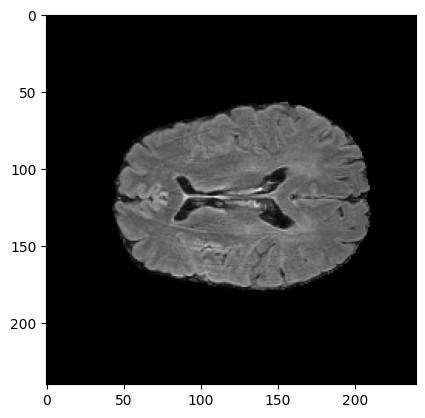

In [8]:
img = "/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UPENN/selected/UPENN-GBM-00001_11/UPENN-GBM-00001_11_FLAIR.nii.gz"

img = nib.load(img)
img = img.get_fdata()
img.shape
plt.imshow(img[:,:,80], cmap="Greys_r")